In [135]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Support Vector Machine Libraries
from sklearn import svm
## Decision Tree Libraries
from sklearn import tree
## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [68]:
data= pd.read_csv("weatherAUS.csv")
data.dropna(inplace=True)
data['RainTmr'] = np.where(data['RainTomorrow']=='Yes', '1', '0')
data['RainTod'] = np.where(data['RainToday']=='Yes', '1', '0')
##Splitting the Dataset 
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20)
y_train=train_data['RainTmr']
y_test=test_data['RainTmr']
x_train=train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
x_test=test_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_train = fea_scaling.transform(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_test = fea_scaling.transform(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [73]:
#### Support Vector Machine 
## Function for calculation cross validation scores
def a(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=3, return_train_score=True)
    return scores
## Linear Kernel Function varies of C ( Margin Parameter)
clf = svm.SVC(kernel='linear', C=0.01)
score1=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=0.1)
score2=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=1)
score3=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=10)
score4=a(clf,X_train,y_train)

In [74]:
print(score1)
print(score2)
print(score3)
print(score4)

{'fit_time': array([11.9081552 ,  6.15948606,  8.55911493]), 'score_time': array([3.4916687 , 1.45511103, 3.51161289]), 'test_score': array([0.85332321, 0.85423471, 0.85156487]), 'train_score': array([0.85301379, 0.85305177, 0.8540828 ])}
{'fit_time': array([15.70301723, 14.58400583, 14.78546667]), 'score_time': array([3.43287516, 3.37000561, 3.41093397]), 'test_score': array([0.85317129, 0.8549943 , 0.85202066]), 'train_score': array([0.85289984, 0.85331763, 0.85491834])}
{'fit_time': array([28.60252666, 27.41370988, 15.54644513]), 'score_time': array([3.36400628, 2.67582655, 3.37298369]), 'test_score': array([0.85339916, 0.8549943 , 0.85202066]), 'train_score': array([0.85286186, 0.85308975, 0.85469047])}
{'fit_time': array([124.04331756, 120.33628917, 124.18083525]), 'score_time': array([3.44782925, 3.33807087, 3.38395905]), 'test_score': array([0.85332321, 0.85491834, 0.85202066]), 'train_score': array([0.85270994, 0.85308975, 0.85461451])}


In [75]:
## Ploynomial Kernel Function 
clf = svm.SVC(kernel='poly', degree=2)
score5=a(clf,X_train,y_train)
clf = svm.SVC(kernel='poly', degree=3)
score6=a(clf,X_train,y_train)
clf = svm.SVC(kernel='poly', degree=4)
score7=a(clf,X_train,y_train)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\svm\base

In [76]:
print(score5)
print(score6)
print(score7)

{'fit_time': array([22.48687696, 21.71988773, 21.26909351]), 'score_time': array([4.49898839, 4.66757655, 4.48899674]), 'test_score': array([0.83243449, 0.83478921, 0.83181404]), 'train_score': array([0.83337764, 0.83383342, 0.83478921])}
{'fit_time': array([32.27571034, 33.06156492, 30.62312627]), 'score_time': array([4.01227283, 3.81684947, 3.95642352]), 'test_score': array([0.85491834, 0.85339916, 0.84958979]), 'train_score': array([0.85479889, 0.85753352, 0.85788074])}
{'fit_time': array([36.37479424, 31.34221935, 36.38771582]), 'score_time': array([4.25862074, 3.93897557, 4.15584278]), 'test_score': array([0.8520319 , 0.84884163, 0.84860225]), 'train_score': array([0.85829314, 0.86136959, 0.86076719])}


In [77]:
# Support Vector Machine with Radial Basis function
clf = svm.SVC(kernel='rbf', gamma=0.01)
score8=a(clf,X_train,y_train)
clf = svm.SVC(kernel='rbf', gamma=0.1)
score9=a(clf,X_train,y_train)
clf = svm.SVC(kernel='rbf', gamma=1)
score10=a(clf,X_train,y_train)
lf = svm.SVC(kernel='rbf', gamma=10)
score11=a(clf,X_train,y_train)

In [78]:
print(score8)
print(score9)
print(score10)
print(score11)

{'fit_time': array([ 8.89315987, 19.19806218, 19.16472197]), 'score_time': array([2.6908555 , 5.87190628, 5.90524864]), 'test_score': array([0.85507026, 0.85279149, 0.8506533 ]), 'train_score': array([0.85331763, 0.85487485, 0.85560197])}
{'fit_time': array([23.08477592, 23.07629204, 23.65077114]), 'score_time': array([5.9700892 , 5.87265086, 5.91719127]), 'test_score': array([0.86046335, 0.85385492, 0.85308417]), 'train_score': array([0.86645904, 0.86835808, 0.86836308])}
{'fit_time': array([103.30079865, 102.93843198, 103.82272649]), 'score_time': array([12.3216207 , 12.52812552, 12.41985512]), 'test_score': array([0.82985188, 0.82575009, 0.82307809]), 'train_score': array([0.95920848, 0.95894261, 0.95913407])}
{'fit_time': array([103.38921118, 103.07889581, 104.11360693]), 'score_time': array([12.4796803 , 12.41384888, 12.44672489]), 'test_score': array([0.82985188, 0.82575009, 0.82307809]), 'train_score': array([0.95920848, 0.95894261, 0.95913407])}


In [79]:
## Decision Tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy")
score12=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)
score13=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
score14=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=8)
score15=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
score16=a(clf,X_train,y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=12)
score17=a(clf,X_train,y_train)

In [80]:
print(score12)
print(score13)
print(score14)
print(score15)
print(score16)
print(score17)

{'fit_time': array([0.26325059, 0.25336552, 0.25435328]), 'score_time': array([0.02297163, 0.02289677, 0.01994991]), 'test_score': array([0.79004937, 0.79156855, 0.79557885]), 'train_score': array([1., 1., 1.])}
{'fit_time': array([0.06884003, 0.06888604, 0.06781363]), 'score_time': array([0.01994944, 0.01994228, 0.01895261]), 'test_score': array([0.83927079, 0.83995442, 0.8334093 ]), 'train_score': array([0.83907478, 0.83774545, 0.8385112 ])}
{'fit_time': array([0.09574533, 0.10079169, 0.09673929]), 'score_time': array([0.02001166, 0.01992416, 0.01995564]), 'test_score': array([0.84519559, 0.8431447 , 0.83918262]), 'train_score': array([0.8470128 , 0.84910175, 0.84933536])}
{'fit_time': array([0.1436162 , 0.1385994 , 0.14266229]), 'score_time': array([0.01896143, 0.02001047, 0.01894712]), 'test_score': array([0.84094189, 0.84139765, 0.84214524]), 'train_score': array([0.85981237, 0.8623571 , 0.86342575])}
{'fit_time': array([0.16951585, 0.17848039, 0.17054367]), 'score_time': array([0

In [81]:
### Boosting with Adaboost method and classification algorithm is Decision Tree
## Hyperparameter n_estimator=25 is constant but we will vary the max_depth for pruning
tree_clf = DecisionTreeClassifier()
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score18 = a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=3)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score19=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score20=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=8)
boostree = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
score21=  a(boostree, X_train, y_train)

In [82]:
print(score18)
print(score19)
print(score20)
print(score21)

{'fit_time': array([0.51885653, 0.48302197, 0.46311712]), 'score_time': array([0.03765559, 0.04661036, 0.04755926]), 'test_score': array([0.7936954 , 0.78663122, 0.7870708 ]), 'train_score': array([1., 1., 1.])}
{'fit_time': array([2.51028872, 2.55123568, 2.5937984 ]), 'score_time': array([0.06981349, 0.07873273, 0.08278298]), 'test_score': array([0.84625902, 0.8448158 , 0.84556366]), 'train_score': array([0.85491283, 0.85928064, 0.86190657])}
{'fit_time': array([3.55844402, 3.50265121, 3.63228893]), 'score_time': array([0.08976054, 0.08258748, 0.11170244]), 'test_score': array([0.84094189, 0.8372199 , 0.83523245]), 'train_score': array([0.87735957, 0.88165141, 0.88275731])}
{'fit_time': array([5.09879804, 5.2884469 , 5.14125538]), 'score_time': array([0.10558462, 0.09927082, 0.11967897]), 'test_score': array([0.81200152, 0.8161033 , 0.81168338]), 'train_score': array([0.96395609, 0.97083064, 0.970376  ])}


In [83]:
### Boosting with Adaboost method and classification algorithm is Decision Tree
## Hyperparameter n_estimator=50 is constant but we will vary the max_depth for pruning
tree_clf = DecisionTreeClassifier()
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score22 = a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=3)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score23=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score24=  a(boostree, X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=8)
boostree = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
score25=  a(boostree, X_train, y_train)

In [84]:
print(score22)
print(score23)
print(score24)
print(score25)

{'fit_time': array([0.49866796, 0.46176529, 0.41788435]), 'score_time': array([0.04299736, 0.04392266, 0.0559895 ]), 'test_score': array([0.79468287, 0.78609951, 0.78805834]), 'train_score': array([1., 1., 1.])}
{'fit_time': array([4.97075272, 4.89890218, 4.95275831]), 'score_time': array([0.14900851, 0.10671997, 0.13164878]), 'test_score': array([0.84504368, 0.844436  , 0.8413856 ]), 'train_score': array([0.86520567, 0.86695279, 0.86729966])}
{'fit_time': array([6.76790571, 7.00926375, 6.84111738]), 'score_time': array([0.0967412 , 0.12085772, 0.11675882]), 'test_score': array([0.83456134, 0.83091531, 0.82869948]), 'train_score': array([0.90614911, 0.90633902, 0.90577288])}
{'fit_time': array([ 9.99926877, 10.45264482, 10.47000909]), 'score_time': array([0.13563561, 0.12108493, 0.13203835]), 'test_score': array([0.81428029, 0.81420433, 0.81381039]), 'train_score': array([1., 1., 1.])}


In [85]:
s1=pd.DataFrame.from_dict(score1)
s2=pd.DataFrame.from_dict(score2)
s3=pd.DataFrame.from_dict(score3)
s4=pd.DataFrame.from_dict(score4)
s5=pd.DataFrame.from_dict(score5)
s6=pd.DataFrame.from_dict(score6)
s7=pd.DataFrame.from_dict(score7)
s8=pd.DataFrame.from_dict(score8)
s9=pd.DataFrame.from_dict(score9)
s10=pd.DataFrame.from_dict(score10)
s11=pd.DataFrame.from_dict(score11)
s12=pd.DataFrame.from_dict(score12)
s13=pd.DataFrame.from_dict(score13)
s14=pd.DataFrame.from_dict(score14)
s15=pd.DataFrame.from_dict(score15)
s16=pd.DataFrame.from_dict(score16)
s17=pd.DataFrame.from_dict(score17)
s18=pd.DataFrame.from_dict(score18)
s19=pd.DataFrame.from_dict(score19)
s20=pd.DataFrame.from_dict(score20)
s21=pd.DataFrame.from_dict(score21)
s22=pd.DataFrame.from_dict(score22)
s23=pd.DataFrame.from_dict(score23)
s24=pd.DataFrame.from_dict(score24)
s25=pd.DataFrame.from_dict(score25)

In [86]:
## Train and Test Accuracy for Linear SVM Kernel function
s1_linear_test=[s1[['test_score']].mean(axis=0),s2[['test_score']].mean(axis=0),s3[['test_score']].mean(axis=0),s4[['test_score']].mean(axis=0)]
s1_linear_train=[s1[['train_score']].mean(axis=0),s2[['train_score']].mean(axis=0),s3[['train_score']].mean(axis=0),s4[['train_score']].mean(axis=0)]
c=[0.01,0.1,1,10]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_Linear kernel as a function of C')

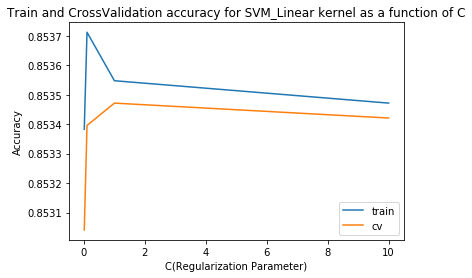

In [87]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
plt.plot(c,s1_linear_train,label='train')
plt.plot(c,s1_linear_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and CrossValidation accuracy for SVM_Linear kernel as a function of C")

In [88]:
## Train and Test Accuracy for Polynomial SVM Kernel function
s1_poly_test=[s5[['test_score']].mean(axis=0),s6[['test_score']].mean(axis=0),s7[['test_score']].mean(axis=0)]
s1_poly_train=[s5[['train_score']].mean(axis=0),s6[['train_score']].mean(axis=0),s7[['train_score']].mean(axis=0)]
d=[2,3,4]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_polynomial kernel as a function of degree')

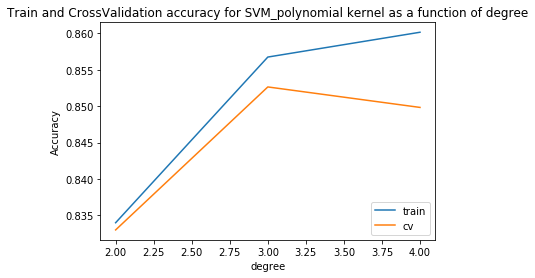

In [92]:
plt.plot(d,s1_poly_train,label='train')
plt.plot(d,s1_poly_test,label='cv')
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and CrossValidation accuracy for SVM_polynomial kernel as a function of degree")

In [93]:
## Train and Test accuracy for RBF(Radial Basis Function) Kernel function 
s1_rbf_test=[s8[['test_score']].mean(axis=0),s9[['test_score']].mean(axis=0),s10[['test_score']].mean(axis=0),s11[['test_score']].mean(axis=0),]
s1_rbf_train=[s8[['train_score']].mean(axis=0),s9[['train_score']].mean(axis=0),s10[['train_score']].mean(axis=0),s11[['train_score']].mean(axis=0)]
gamma=[0.01,0.1,1,10]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_RBF kernel as a function of Gamma')

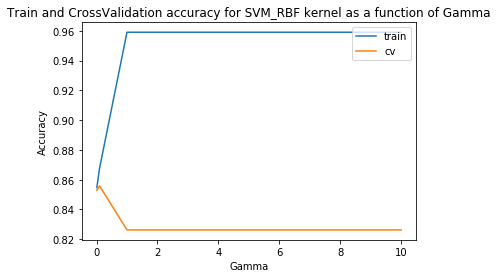

In [91]:
plt.plot(c,s1_sig_train,label='train')
plt.plot(c,s1_sig_test,label='cv')
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for SVM_RBF kernel as a function of Gamma")

In [101]:
## Train and Test accuracy for Decision Tree Classifier 
s1_tree_test=[s13[['test_score']].mean(axis=0),s14[['test_score']].mean(axis=0),s15[['test_score']].mean(axis=0),s16[['test_score']].mean(axis=0),s17[['test_score']].mean(axis=0)]
s1_tree_train=[s13[['train_score']].mean(axis=0),s14[['train_score']].mean(axis=0),s15[['train_score']].mean(axis=0),s16[['train_score']].mean(axis=0),s17[['train_score']].mean(axis=0)]
dep=[3,5,8,10,12]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Decision Tree as a function of Depth of the Tree')

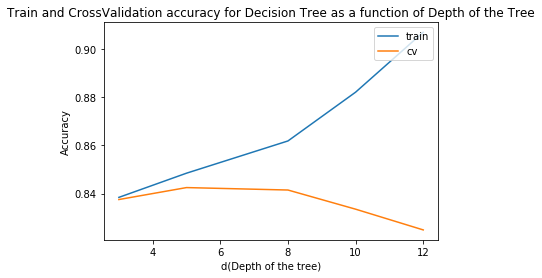

In [102]:
plt.plot(dep,s1_tree_train,label='train')
plt.plot(dep,s1_tree_test,label='cv')
plt.xlabel("d(Depth of the tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Decision Tree as a function of Depth of the Tree")

In [103]:
## Train and Test accuracy for Adaboost Classifier with n_estimators=25
s1_adaboost_test=[s19[['test_score']].mean(axis=0),s20[['test_score']].mean(axis=0),s21[['test_score']].mean(axis=0),]
s1_adaboost_train=[s19[['train_score']].mean(axis=0),s20[['train_score']].mean(axis=0),s21[['train_score']].mean(axis=0)]
dep=[3,5,8]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =25')

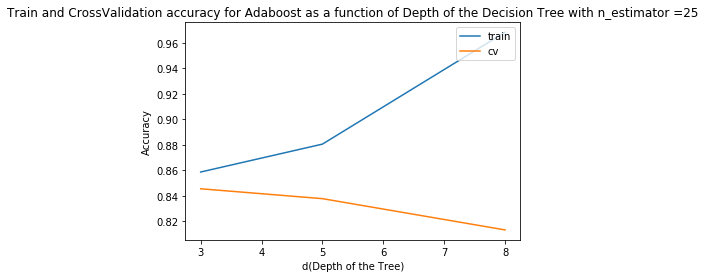

In [104]:
plt.plot(dep,s1_adaboost_train,label='train')
plt.plot(dep,s1_adaboost_test,label='cv')
plt.xlabel("d(Depth of the Tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =25")

In [105]:
## Train and Test accuracy for Adaboost Classifier with n_estimators=50
s1_adaboost1_test=[s23[['test_score']].mean(axis=0),s24[['test_score']].mean(axis=0),s25[['test_score']].mean(axis=0)]
s1_adaboost1_train=[s23[['train_score']].mean(axis=0),s24[['train_score']].mean(axis=0),s25[['train_score']].mean(axis=0)]
dep=[3,5,8]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =50')

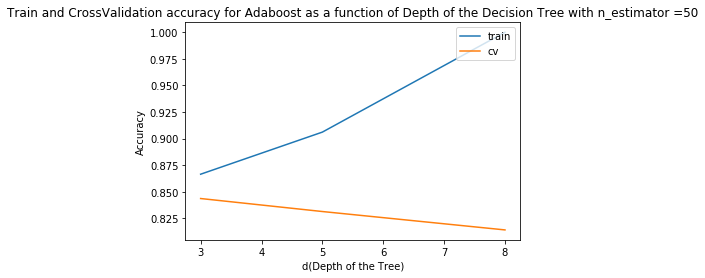

In [106]:
plt.plot(dep,s1_adaboost1_train,label='train')
plt.plot(dep,s1_adaboost1_test,label='cv')
plt.xlabel("d(Depth of the Tree)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for Adaboost as a function of Depth of the Decision Tree with n_estimator =50")

In [107]:
## The best model in each algorithms 
## For SVM Linear , from the graph, the best c= 1 
## for SVM Polynomial from the graph , the best degree = 3
## for SVM RBF, from the graph, the best gamma = 0.1
### out of all the above kernerls- RBF is the one performing the best( All the kernels are very close) 
## for decision tree, when depth =5 , we get the best results
## for adabooost , when depth =3, we get the best results
## the best is rbf of all classifier functions
## we will run the best models on the test set

In [117]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf1 = svm.SVC(kernel='linear', C=1)
clf1.fit(X_train,y_train)
##Other SVM Kernel Functions
clf2 = svm.SVC(kernel='poly', degree=3)
clf2.fit(X_train,y_train)
clf3 = svm.SVC(kernel='rbf', gamma=0.1)
clf3.fit(X_train,y_train)
## Decision tree function
clf4 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf4.fit(X_train,y_train)
## Adaboost function
tree_clf1 = DecisionTreeClassifier(max_depth=3)
boostree1 = AdaBoostClassifier(n_estimators=50, base_estimator=tree_clf, learning_rate = 1)
boostree1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)

In [120]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)
y_pred4=clf4.predict(X_test)
y_pred5=boostree1.predict(X_test)

In [121]:
## for SVM-Linear
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[12595   672]
 [ 1827  1832]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13267
           1       0.73      0.50      0.59      3659

   micro avg       0.85      0.85      0.85     16926
   macro avg       0.80      0.73      0.75     16926
weighted avg       0.84      0.85      0.84     16926

0.8523573200992556


In [122]:
## for SVM-Polynomial
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[12815   452]
 [ 2054  1605]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     13267
           1       0.78      0.44      0.56      3659

   micro avg       0.85      0.85      0.85     16926
   macro avg       0.82      0.70      0.74     16926
weighted avg       0.84      0.85      0.84     16926

0.8519437551695617


In [123]:
## for SVM RBF
print(confusion_matrix(y_test,y_pred3))  
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[12689   578]
 [ 1861  1798]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13267
           1       0.76      0.49      0.60      3659

   micro avg       0.86      0.86      0.86     16926
   macro avg       0.81      0.72      0.75     16926
weighted avg       0.85      0.86      0.84     16926

0.8559021623537753


In [124]:
## for decision tree
print(confusion_matrix(y_test,y_pred4))  
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

[[12668   599]
 [ 2047  1612]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     13267
           1       0.73      0.44      0.55      3659

   micro avg       0.84      0.84      0.84     16926
   macro avg       0.79      0.70      0.73     16926
weighted avg       0.83      0.84      0.83     16926

0.8436724565756824


In [125]:
## for adaboost 
print(confusion_matrix(y_test,y_pred5))  
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))

[[11838  1429]
 [ 1714  1945]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13267
           1       0.58      0.53      0.55      3659

   micro avg       0.81      0.81      0.81     16926
   macro avg       0.72      0.71      0.72     16926
weighted avg       0.81      0.81      0.81     16926

0.814309346567411


In [126]:
accuracy=[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]
Functions=['SVM_Linear','SVM_Polynomial','SVM_RBF','Decision_tree','Adaboost']

(0.8, 0.865)

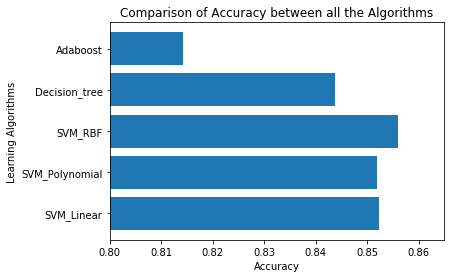

In [154]:
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.xlim([0.8, 0.865])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

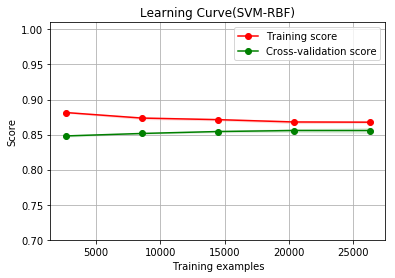

In [130]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curve(SVM-RBF)"
estimator = svm.SVC(kernel='rbf', gamma=0.1)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

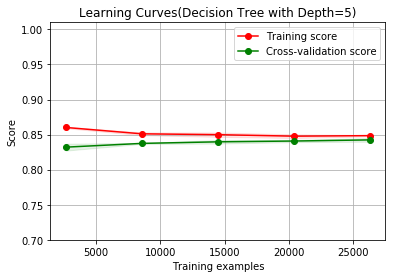

In [131]:
title = "Learning Curves(Decision Tree with Depth=5)"
estimator = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\Users\\Aravind KK\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

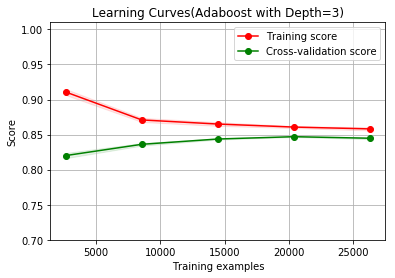

In [132]:
title = "Learning Curves(Adaboost with Depth=3)"
tree_clf = DecisionTreeClassifier(max_depth=3)
estimator = AdaBoostClassifier(n_estimators=25, base_estimator=tree_clf, learning_rate = 1)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01))

In [133]:
print(s1_linear_test)
print(s1_poly_test)
print(s1_rbf_test)
print(s1_tree_test)
print(s1_adaboost_test)
print(s1_adaboost1_test)

[test_score    0.853041
dtype: float64, test_score    0.853395
dtype: float64, test_score    0.853471
dtype: float64, test_score    0.853421
dtype: float64]
[test_score    0.833013
dtype: float64, test_score    0.852636
dtype: float64, test_score    0.849825
dtype: float64]
[test_score    0.852838
dtype: float64, test_score    0.855801
dtype: float64, test_score    0.826227
dtype: float64, test_score    0.826227
dtype: float64]
[test_score    0.837545
dtype: float64, test_score    0.842508
dtype: float64, test_score    0.841495
dtype: float64, test_score    0.833544
dtype: float64, test_score    0.824935
dtype: float64]
[test_score    0.845546
dtype: float64, test_score    0.837798
dtype: float64, test_score    0.813263
dtype: float64]
[test_score    0.843622
dtype: float64, test_score    0.831392
dtype: float64, test_score    0.814098
dtype: float64]


In [134]:
print(s1_linear_train)
print(s1_poly_train)
print(s1_rbf_train)
print(s1_tree_train)
print(s1_adaboost_train)
print(s1_adaboost1_train)

[train_score    0.853383
dtype: float64, train_score    0.853712
dtype: float64, train_score    0.853547
dtype: float64, train_score    0.853471
dtype: float64]
[train_score    0.834
dtype: float64, train_score    0.856738
dtype: float64, train_score    0.860143
dtype: float64]
[train_score    0.854598
dtype: float64, train_score    0.867727
dtype: float64, train_score    0.959095
dtype: float64, train_score    0.959095
dtype: float64]
[train_score    0.838444
dtype: float64, train_score    0.848483
dtype: float64, train_score    0.861865
dtype: float64, train_score    0.882109
dtype: float64, train_score    0.906986
dtype: float64]
[train_score    0.8587
dtype: float64, train_score    0.880589
dtype: float64, train_score    0.968388
dtype: float64]
[train_score    0.866486
dtype: float64, train_score    0.906087
dtype: float64, train_score    1.0
dtype: float64]


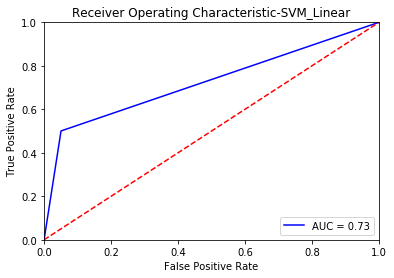

ROC_AUC Score : 0.7250156265601196


In [155]:
### ROC Curve for the SVM Linear Kernel function
y_pred1_1=np.array(y_pred1).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test1_1,y_pred1_1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic-SVM_Linear')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc1) )

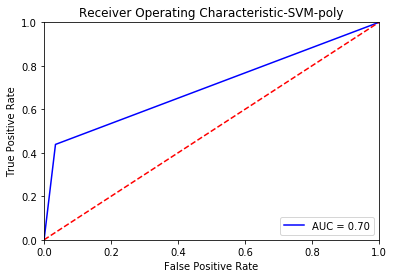

ROC_AUC Score : 0.7022874713149133


In [156]:
### ROC Curve for the SVM Polynomial function
y_pred2_2=np.array(y_pred2).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test1_1,y_pred2_2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic-SVM-poly')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc2) )

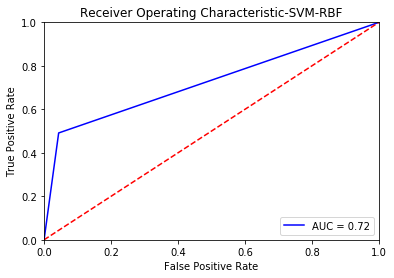

ROC_AUC Score : 0.7239121729538589


In [163]:
### ROC Curve for the SVM RBF function
y_pred3_3=np.array(y_pred3).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test1_1,y_pred3_3)
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic-SVM-RBF')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc3) )

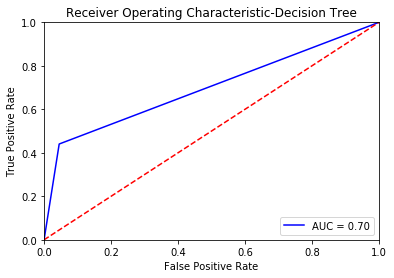

ROC_AUC Score : 0.697703955011657


In [158]:
### ROC Curve for the Decision Tree function
y_pred4_4=np.array(y_pred4).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test1_1,y_pred4_4)
roc_auc4 = metrics.auc(fpr4, tpr4)

plt.title('Receiver Operating Characteristic-Decision Tree')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc4) )

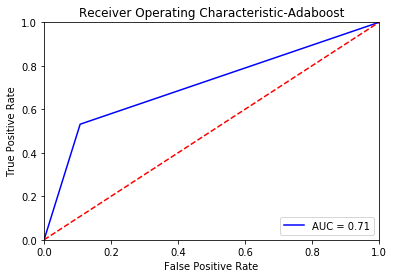

ROC_AUC Score : 0.711927570051825


In [159]:
### ROC Curve for the Adaboost  function
y_pred5_5=np.array(y_pred5).astype(int)
y_test1_1=np.array(y_test).astype(int)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test1_1,y_pred5_5)
roc_auc5 = metrics.auc(fpr5, tpr5)

plt.title('Receiver Operating Characteristic-Adaboost')
plt.plot(fpr5, tpr5, 'b', label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc5) )

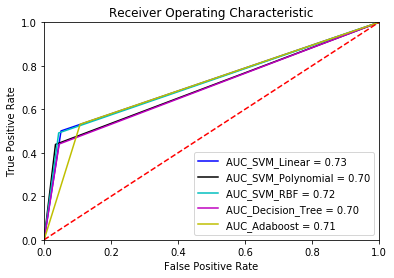

In [147]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC_SVM_Linear = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'k', label = 'AUC_SVM_Polynomial = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'c', label = 'AUC_SVM_RBF = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'm', label = 'AUC_Decision_Tree = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'y', label = 'AUC_Adaboost = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()